In [279]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import random

In [280]:
# 读取实验训练集和验证集
X, y = sd.load_svmlight_file('a9a.txt',n_features = 123)

In [281]:
# 将数据集切分为训练集和验证集
X_train, X_valid, y_train, y_valid = sms.train_test_split(X, y)

In [282]:
# 将稀疏矩阵转为ndarray类型
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)

In [283]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)), X_valid), axis = 1)

In [284]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((12210, 124), (4071, 124), (12210, 1), (4071, 1))

In [285]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [286]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [287]:
def logistic_loss(X, y ,theta):
    hx = sigmoid(X.dot(theta))
    cost = np.multiply((1+y), np.log(1+hx)) + np.multiply((1-y), np.log(1-hx))
    return -cost.mean()/2

In [288]:
def logistic_gradient(X, y, theta):
    return X.T.dot(sigmoid(X.dot(theta)) - y)

In [289]:
theta = np.zeros((X_train.shape[1],1))
logistic_loss(X_train, y_train, theta)

0.4383339126231651

In [290]:
def logistic_score(X, y, theta):
    hx = sigmoid(X.dot(theta))
    hx[hx>=0.5] = 1
    hx[hx<0.5] = -1
    hx = (hx==y)
    return np.mean(hx)

In [291]:
def logistic_descent(X, y, theta, alpha, num_iters, batch_size, X_valid, y_valid):
    X_sample = np.matrix(random.sample(X.tolist(), batch_size))
    y_sample = np.matrix(random.sample(y.tolist(), batch_size))
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    scores = np.zeros((num_iters,1))
    for i in range(num_iters):
        grad = logistic_gradient(X_sample, y_sample, theta)
        theta = theta - alpha * grad
        loss_train[i] = logistic_loss(X, y, theta)
        loss_valid[i] = logistic_loss(X_valid, y_valid, theta)
        scores[i] = logistic_score(X, y, theta)
    return theta, loss_train, loss_valid, scores

In [292]:
theta = np.zeros((X_train.shape[1],1))
alpha = 0.0001
num_iters = 200
opt_theta, loss_train, loss_valid, scores = logistic_descent(X_train, y_train, theta, alpha, num_iters, 64, X_valid, y_valid)
loss_train.max(), loss_train.min(), loss_valid.max(), loss_valid.min()

(0.4243570106310033,
 0.006336116789905614,
 0.40602853343090334,
 0.006091128204249764)

In [293]:
logistic_score(X_valid, y_valid, opt_theta)

0.7509211495946941

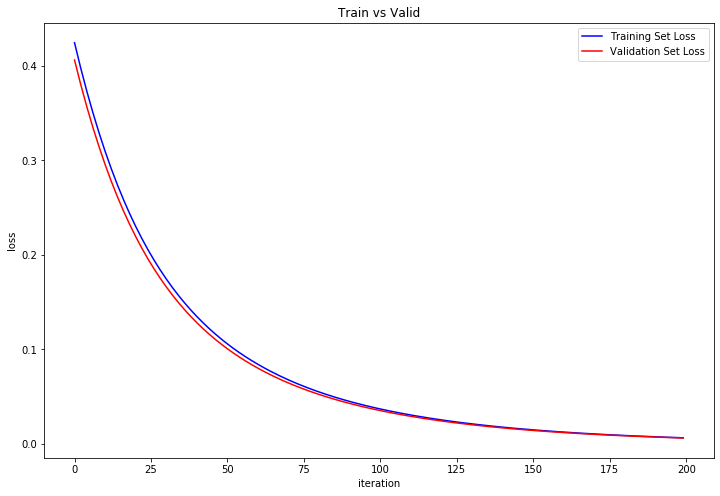

In [294]:
iteration = np.arange(0, num_iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train vs Valid')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Training Set Loss')
plt.plot(iteration, loss_valid, 'r', label='Validation Set Loss')
# plt.plot(iteration, scores, 'g', label='Score on Validation Set')
plt.legend()
plt.show()

In [295]:
def hinge_loss(X, y, theta, C):
    loss = np.maximum(0, 1 - np.multiply(y, X.dot(theta))).mean()
    reg = np.multiply(theta,theta).sum() / 2
    return C * loss + reg

In [296]:
theta = np.random.random((X_train.shape[1],1))
C = 0.4
hinge_loss(X_train, y_train, theta, C)

23.736313620311282

In [297]:
def hinge_gradient(X, y, theta, C):
    error = np.maximum(0, 1 - np.multiply(y, X.dot(theta)))
    index = np.where(error==0)
    x = X.copy()
    x[index,:] = 0
    grad = theta - C * x.T.dot(y) / len(y)
    grad[-1] = grad[-1] - theta[-1]
    return grad

In [298]:
def svm_descent(X, y, theta, alpha, num_iters, batch_size, X_valid, y_valid, C):
    X_sample = np.matrix(random.sample(X.tolist(), batch_size))
    y_sample = np.matrix(random.sample(y.tolist(), batch_size))
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    for i in range(num_iters):
        grad = hinge_gradient(X_sample, y_sample, theta, C)
        theta = theta - alpha * grad
        loss_train[i] = hinge_loss(X, y, theta, C)
        loss_valid[i] = hinge_loss(X_valid, y_valid, theta, C)
    return theta, loss_train, loss_valid

In [299]:
def svm_score(X, y, theta):
    hx = X.dot(theta)
    hx[hx>=5] = 1
    hx[hx<5] = -1
    hx = (hx==y)
    return np.mean(hx)

In [303]:
theta = np.random.random((X_train.shape[1],1))
alpha = 0.01
num_iters = 500
opt_theta, loss_train, loss_valid = svm_descent(X_train, y_train, theta, alpha, num_iters, 64, X_valid, y_valid, C)
loss_train.max(), loss_train.min(), loss_valid.max(), loss_valid.min()

(22.584937844110428,
 0.2744215036864591,
 22.533763151281054,
 0.2871998214057941)

In [304]:
svm_score(X_valid, y_valid, opt_theta)

0.7509211495946941

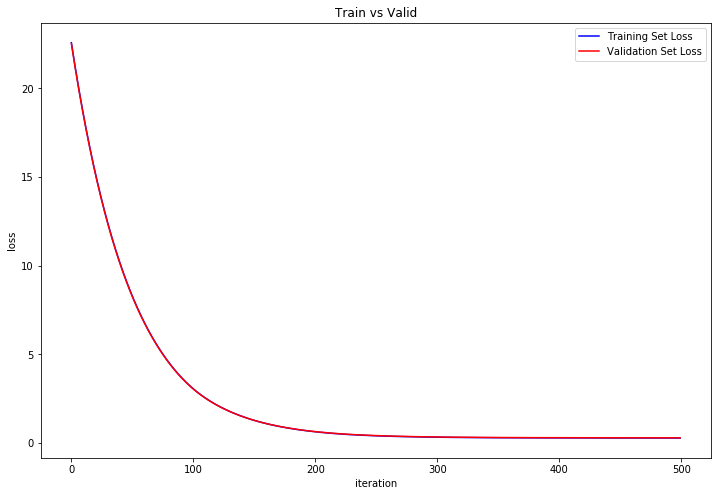

In [305]:
iteration = np.arange(0, num_iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train vs Valid')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Training Set Loss')
plt.plot(iteration, loss_valid, 'r', label='Validation Set Loss')
plt.legend()
plt.show()